<a href="https://colab.research.google.com/github/vatsal1452/Face_Detection/blob/main/Facemodule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd'/content/gdrive/My Drive/python_1805410176'


/content/gdrive/My Drive/python_1805410176


In [3]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=1e256692e56e94671a8dfc0502ca3f3b2c3d34e4ba93fcbe0b73ac23628c4784
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [4]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import math 
import face_recognition

In [5]:
known_face_images = [
    face_recognition.load_image_file('/content/gdrive/My Drive/python_1805410176/2.jfif'),
    face_recognition.load_image_file('/content/gdrive/My Drive/python_1805410176/Vishwas.jfif'),
    
    face_recognition.load_image_file('/content/gdrive/My Drive/python_1805410176/1.jfif'),
   
    
]

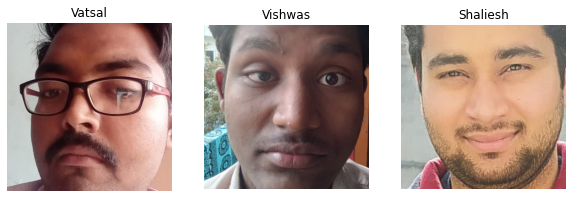

In [7]:
known_face_name=[
                 'Vatsal',
                 
                 "Vishwas",
                 
                 'Shaliesh',
                

]

known_face_encodings = [face_recognition.face_encodings(image)[0] for image in known_face_images]
known_face_locations = [face_recognition.face_locations(image)[0] for image in known_face_images]

columns = 3
rows = math.ceil(len(known_face_name) / columns)
_, ax_tables = plt.subplots(rows, columns, figsize=[10,5])

for index, (top, right, bottom, left) in enumerate(known_face_locations):
    face_img = known_face_images[index][top:bottom, left:right]
    row = math.floor(index / columns)
    name = known_face_name[index]
    column = index % columns
    if rows > 1:
        ax = ax_tables[row][column]
    else:
        ax = ax_tables[column]
    ax.axis('off')
    ax.set_title(name)
    ax.imshow(face_img)

face names: ['Vatsal:70.38%']


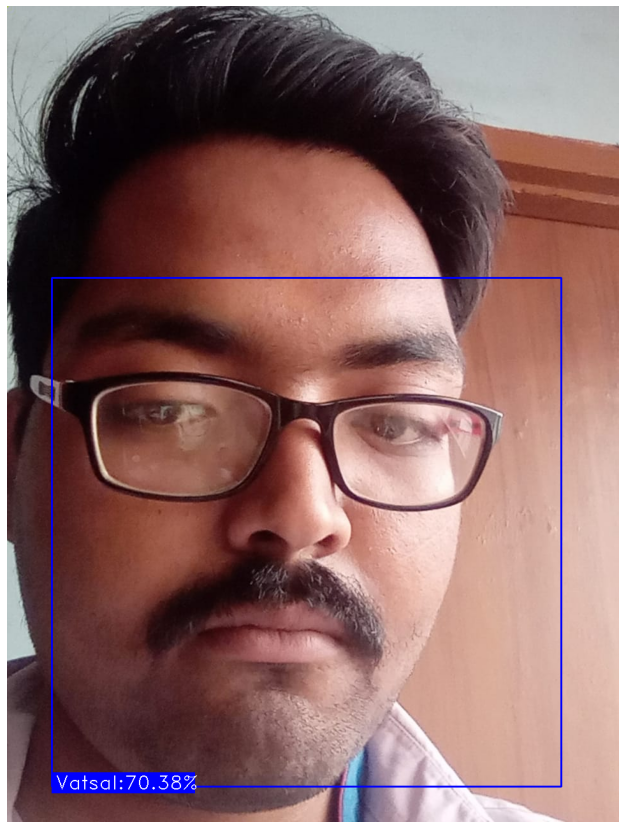

In [8]:
e_encodings = []
face_names = []
tolerance = 0.47
scale = 1



frame = cv2.imread('4.jfif')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
rgb_small_frame = cv2.resize(frame, (0, 0), fx=scale, fy=scale)


face_locations = face_recognition.face_locations(rgb_small_frame)
face_encodings = face_recognition.face_encodings(
    rgb_small_frame, face_locations)

face_names = []
for face_encoding in face_encodings:
   
    distances = face_recognition.face_distance(
        known_face_encodings, face_encoding)
    name = ""

    distance = min(distances)    
    if distance <= tolerance:
        index = [i for i, j in enumerate(distances) if j == distance][0]
        name = known_face_names[index] + ":" + str(round((1-distance) * 100,2)) + "%"
        
    face_names.append(name)

    

print('face names:', face_names)


for (top, right, bottom, left), name in zip(face_locations, face_names):
    
    top = round(top / scale)
    right = round(right / scale)
    bottom = round(bottom / scale)
    left = round(left / scale)

    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
  
    font = cv2.FONT_HERSHEY_DUPLEX
    labelSize, baseLine = cv2.getTextSize(
        name, font, 1.0, 1)
    cv2.rectangle(frame, (left, bottom - labelSize[1]),
                  (left + labelSize[0], bottom + baseLine), (0, 0, 255), cv2.FILLED)

    cv2.putText(frame, name, (left + 6, bottom + baseLine - 6),
                font, 1.0, (255, 255, 255), 1)    
  

plt.figure(figsize=[20,15])
plt.axis('off')
plt.imshow(frame)